In [1]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.multiclass import type_of_target
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [2]:
d =pd.read_csv("Real.csv")
d.info(memory_usage='deep')

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (9,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930621 entries, 0 to 930620
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     930621 non-null  int64  
 1   List Year         930621 non-null  int64  
 2   Date Recorded     930619 non-null  object 
 3   Town              930621 non-null  object 
 4   Address           930570 non-null  object 
 5   Assessed Value    930621 non-null  float64
 6   Sale Amount       930621 non-null  float64
 7   Sales Ratio       930621 non-null  float64
 8   Property Type     925733 non-null  object 
 9   Residential Type  548176 non-null  object 
 10  Non Use Code      275231 non-null  object 
 11  Assessor Remarks  135512 non-null  object 
 12  OPM remarks       7946 non-null    object 
 13  Location          680517 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 484.7 MB


In [3]:
print ("this dataset represents Maryland's total residential sales from 2002 to 2018.")
print("")
print ("our model purpose is - given the year the real estate was sold,the city it was sold in and the price it sold for,the model will predict the proprety type varying between:Condo,V,R,Single Family and Two Family.")



this dataset represents Maryland's total residential sales from 2002 to 2018.

our model purpose is - given the year the real estate was sold,the city it was sold in and the price it sold for,the model will predict the proprety type varying between:Condo,V,R,Single Family and Two Family.


In [4]:
cols=['List Year','Town','Sale Amount','Property Type']
df=pd.read_csv("Real.csv",usecols=cols)

In [5]:
# checking for missing values
df.isna().sum()

List Year           0
Town                0
Sale Amount         0
Property Type    4888
dtype: int64

In [6]:
# dropping the missing values
print("because our dataframe is so big and the NaN value are so small compared to it we can drop all the nan values and make our model on the smaller dataframe.")
n=df.dropna()

because our dataframe is so big and the NaN value are so small compared to it we can drop all the nan values and make our model on the smaller dataframe.


In [7]:
n.isna().sum()

List Year        0
Town             0
Sale Amount      0
Property Type    0
dtype: int64

In [8]:
n

,List Year,Town,Sale Amount,Property Type
0,2019,Ansonia,284000.0,Single Family
1,2019,Avon,173800.0,Condo
2,2019,Avon,317500.0,Single Family
3,2019,Beacon Falls,229900.0,Single Family
4,2019,Bethany,560000.0,Single Family
...,...,...,...,...
930616,2018,Stamford,214350.0,Residential
930617,2018,West Hartford,176000.0,Residential
930618,2018,Stafford,37000.0,Commercial
930619,2018,Ridgefield,725000.0,Residential


In [9]:
# renaming columns and dropping duplicates
n=n.rename({'List Year':'List_Year','Sale Amount':'Sale_Amount','Property Type':'Property_Type'},axis='columns')
n.drop_duplicates()


,List_Year,Town,Sale_Amount,Property_Type
0,2019,Ansonia,284000.0,Single Family
1,2019,Avon,173800.0,Condo
2,2019,Avon,317500.0,Single Family
3,2019,Beacon Falls,229900.0,Single Family
4,2019,Bethany,560000.0,Single Family
...,...,...,...,...
930613,2018,Stamford,900000.0,Commercial
930615,2018,Woodbridge,317000.0,Residential
930616,2018,Stamford,214350.0,Residential
930617,2018,West Hartford,176000.0,Residential


In [10]:
# defining dn
dn=n[(n.Property_Type== 'Single Family')|(n.Property_Type== 'A')|(n.Property_Type== 'Vacant Land')|(n.Property_Type== 'Commercial')|(n.Property_Type== 'Two Family')|(n.Property_Type== 'R')|(n.Property_Type== 'Condo')]
dn

,List_Year,Town,Sale_Amount,Property_Type
0,2019,Ansonia,284000.0,Single Family
1,2019,Avon,173800.0,Condo
2,2019,Avon,317500.0,Single Family
3,2019,Beacon Falls,229900.0,Single Family
4,2019,Bethany,560000.0,Single Family
...,...,...,...,...
930515,2018,Putnam,885000.0,Vacant Land
930518,2018,Waterbury,370000.0,Commercial
930561,2018,Simsbury,325000.0,Commercial
930613,2018,Stamford,900000.0,Commercial


In [11]:
print("we sorted the dataframe to the new dataframe dn,this data only have the wanted property types,this data also have no NaN           values.")

we sorted the dataframe to the new dataframe dn,this data only have the wanted property types,this data also have no NaN           values.


In [12]:
dn.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388176 entries, 0 to 930618
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   List_Year      388176 non-null  int64  
 1   Town           388176 non-null  object 
 2   Sale_Amount    388176 non-null  float64
 3   Property_Type  388176 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 55.6 MB


In [13]:
dn

,List_Year,Town,Sale_Amount,Property_Type
0,2019,Ansonia,284000.0,Single Family
1,2019,Avon,173800.0,Condo
2,2019,Avon,317500.0,Single Family
3,2019,Beacon Falls,229900.0,Single Family
4,2019,Bethany,560000.0,Single Family
...,...,...,...,...
930515,2018,Putnam,885000.0,Vacant Land
930518,2018,Waterbury,370000.0,Commercial
930561,2018,Simsbury,325000.0,Commercial
930613,2018,Stamford,900000.0,Commercial


In [14]:
dn = dn.reset_index()
dn

,index,List_Year,Town,Sale_Amount,Property_Type
0,0,2019,Ansonia,284000.0,Single Family
1,1,2019,Avon,173800.0,Condo
2,2,2019,Avon,317500.0,Single Family
3,3,2019,Beacon Falls,229900.0,Single Family
4,4,2019,Bethany,560000.0,Single Family
...,...,...,...,...,...
388171,930515,2018,Putnam,885000.0,Vacant Land
388172,930518,2018,Waterbury,370000.0,Commercial
388173,930561,2018,Simsbury,325000.0,Commercial
388174,930613,2018,Stamford,900000.0,Commercial


In [15]:
le3 = preprocessing.LabelEncoder()

In [16]:
Rv=(dn.Property_Type=='R').sum()
Vv=(dn.Property_Type=='Vacant Land').sum()
SFv=(dn.Property_Type=='Single Family').sum()
TFv=(dn.Property_Type=='Two Family').sum()
Cv=(dn.Property_Type=='Condo').sum()
COv=(dn.Property_Type=='Commercial').sum()
Av=(dn.Property_Type=='A').sum()

TOTALv=388176

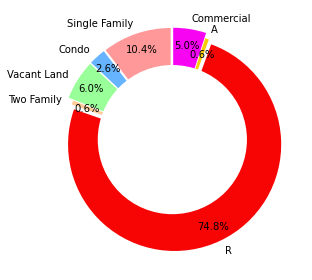

In [17]:
# Pie chart-for the diffrent property types
labels = ['Single Family', 'Condo', 'Vacant Land','Two Family', 'R','A','Commercial']
sizes = [SFv/TOTALv, Cv/TOTALv,Vv/TOTALv, TFv/TOTALv,Rv/TOTALv,Av/TOTALv,COv/TOTALv]

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#f70505','#f7cb05','#f705f3']

explode = (0.05,0.05,0.05,0.00,0.05,0.00,0.05)
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

  
plt.tight_layout()
plt.show()

In [18]:
# label encoding
for Property_Type in dn:
    if dn[Property_Type].dtype == object:
        dn[Property_Type] = le3.fit_transform(dn[Property_Type])
else:
    pass
dn

,index,List_Year,Town,Sale_Amount,Property_Type
0,0,2019,1,284000.0,4
1,1,2019,3,173800.0,2
2,2,2019,3,317500.0,4
3,3,2019,5,229900.0,4
4,4,2019,7,560000.0,4
...,...,...,...,...,...
388171,930515,2018,115,885000.0,6
388172,930518,2018,150,370000.0,1
388173,930561,2018,127,325000.0,1
388174,930613,2018,134,900000.0,1


In [19]:
y=dn.drop(['Property_Type'],axis=1)
x=y.drop(['index'],axis=1)
x

,List_Year,Town,Sale_Amount
0,2019,1,284000.0
1,2019,3,173800.0
2,2019,3,317500.0
3,2019,5,229900.0
4,2019,7,560000.0
...,...,...,...
388171,2018,115,885000.0
388172,2018,150,370000.0
388173,2018,127,325000.0
388174,2018,134,900000.0


In [20]:
print('defining y as our target')
y=dn['Property_Type']
y

defining y as our target


0         4
1         2
2         4
3         4
4         4
         ..
388171    6
388172    1
388173    1
388174    1
388175    1
Name: Property_Type, Length: 388176, dtype: int32

In [21]:
y.value_counts()

3    290287
4     40518
6     23414
1     19404
2      9932
5      2411
0      2210
Name: Property_Type, dtype: int64

type 0=two family
type 1=commercial
type 2=condo
type 3=R
type 4=single family
type 5=A 
type 6=Vacant land


<AxesSubplot:ylabel='Property_Type'>

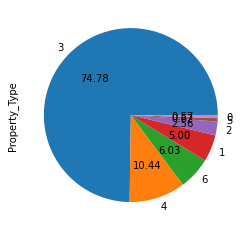

In [22]:
print('type 0=two family')
print('type 1=commercial') 
print('type 2=condo')
print('type 3=R')
print('type 4=single family')
print('type 5=A ')
print('type 6=Vacant land')
      
       
      
     
y.value_counts().plot.pie(autopct='%.2f')


Property Type=4, n=40518 (10.438%)
Property Type=2, n=9932 (2.559%)
Property Type=3, n=290287 (74.782%)
Property Type=5, n=2411 (0.621%)
Property Type=0, n=2210 (0.569%)
Property Type=6, n=23414 (6.032%)
Property Type=1, n=19404 (4.999%)


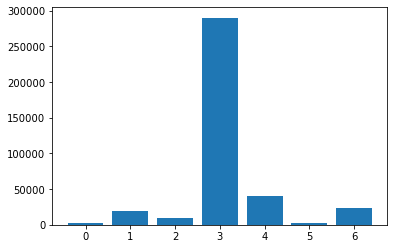

In [23]:
counter=Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Property Type=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

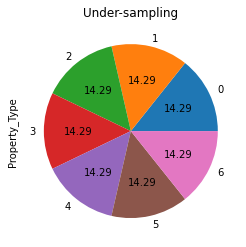

In [24]:
from imblearn.under_sampling import RandomUnderSampler

# using under sampler to balance the dataframe
rus = RandomUnderSampler(sampling_strategy='not minority') # Numerical value

x_res, y_res = rus.fit_resample(x, y)


ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [25]:
x_res

,List_Year,Town,Sale_Amount
0,2001,88,142500.0
1,2002,24,119000.0
2,2002,63,470000.0
3,2003,134,228000.0
4,2003,134,170000.0
...,...,...,...
15465,2008,75,275000.0
15466,2015,116,170000.0
15467,2013,21,34000.0
15468,2013,104,125000.0


In [26]:
y_res

0        0
1        0
2        0
3        0
4        0
        ..
15465    6
15466    6
15467    6
15468    6
15469    6
Name: Property_Type, Length: 15470, dtype: int32

In [27]:
# creating a test and train datas
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=42)

In [28]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((12376, 3), (12376,), (3094, 3), (3094,))

In [29]:
x_train_sca=x_train.drop(['Town'],axis=1)

In [30]:
scaler = StandardScaler()

x_train_sca=scaler.fit_transform(x_train_sca)

In [31]:
x_train_sca

array([[ 0.36997522, -0.12103846],
       [-0.49999786, -0.09117452],
       [ 0.94995727,  0.07110499],
       ...,
       [ 0.94995727, -0.1010916 ],
       [-1.36997094, -0.11033252],
       [-1.51496646, -0.11170739]])

In [32]:
x_test_sca=x_test.drop(['Town'],axis=1)

In [33]:
x_test_sca=scaler.transform(x_test_sca)

In [34]:
x_test_sca

array([[ 0.36997522, -0.08170822],
       [ 0.94995727, -0.12250348],
       [ 0.94995727, -0.08508904],
       ...,
       [ 0.94995727, -0.01807301],
       [-0.78998889,  0.07786663],
       [ 0.22497971,  0.03932525]])

In [35]:
x_train_scaled = pd.DataFrame(x_train_sca,  columns=['List_Year','Sale_Amount'])

In [36]:
x_train_scaled

,List_Year,Sale_Amount
0,0.369975,-0.121038
1,-0.499998,-0.091175
2,0.949957,0.071105
3,-0.499998,-0.083286
4,0.079984,0.307086
...,...,...
12371,0.949957,-0.090048
12372,0.369975,-0.091175
12373,0.949957,-0.101092
12374,-1.369971,-0.110333


In [37]:
x_train = x_train.reset_index()
x_train=x_train.drop(['index'],axis=1)


x_train_scaled.insert(loc=1, column="Town",value=x_train["Town"])

x_train_scaled





,List_Year,Town,Sale_Amount
0,0.369975,82,-0.121038
1,-0.499998,136,-0.091175
2,0.949957,17,0.071105
3,-0.499998,41,-0.083286
4,0.079984,14,0.307086
...,...,...,...
12371,0.949957,92,-0.090048
12372,0.369975,45,-0.091175
12373,0.949957,83,-0.101092
12374,-1.369971,134,-0.110333


In [38]:
x_train_scaled.isna().sum()

List_Year      0
Town           0
Sale_Amount    0
dtype: int64

In [39]:
x_test_scaled= pd.DataFrame(x_test_sca,  columns=['List_Year','Sale_Amount'])
x_test_scaled

,List_Year,Sale_Amount
0,0.369975,-0.081708
1,0.949957,-0.122503
2,0.949957,-0.085089
3,-1.514966,-0.021530
4,0.659966,-0.124081
...,...,...
3089,0.369975,-0.114840
3090,0.949957,-0.070484
3091,0.949957,-0.018073
3092,-0.789989,0.077867


In [40]:
x_test = x_test.reset_index()
x_test=x_test.drop(['index'],axis=1)


x_test_scaled.insert(loc=1, column="Town",value=x_test["Town"])

x_test_scaled


,List_Year,Town,Sale_Amount
0,0.369975,48,-0.081708
1,0.949957,102,-0.122503
2,0.949957,83,-0.085089
3,-1.514966,143,-0.021530
4,0.659966,93,-0.124081
...,...,...,...
3089,0.369975,62,-0.114840
3090,0.949957,88,-0.070484
3091,0.949957,107,-0.018073
3092,-0.789989,14,0.077867


In [41]:
x_test_scaled.isna().sum()

List_Year      0
Town           0
Sale_Amount    0
dtype: int64

In [42]:
# x_test_scaled,x_train_scaled- test and train sets both balanced and scaled.

In [43]:
# label encoding on the town column
le = preprocessing.LabelEncoder()
le2 = preprocessing.LabelEncoder()


for Town in x_train_scaled.columns:
    if x_train_scaled[Town].dtype == object:
        x_train_scaled[Town] = le.fit_transform(x_train_scaled[Town])
else:
    pass

for Town in x_test_scaled.columns:
    if x_test_scaled[Town].dtype == object:
        x_test_scaled[Town] = le2.fit_transform(x_test_scaled[Town])
else:
    pass



In [44]:
#RandomForest model
clf = RandomForestClassifier()

In [45]:
clf.fit(x_train_scaled,y_train)
scores1=cross_val_score(clf,x_train_scaled,y_train,cv=10)
scores1

array([0.66558966, 0.66962843, 0.6631664 , 0.66478191, 0.67447496,
       0.67366721, 0.69361358, 0.65642684, 0.66774454, 0.67906225])

In [46]:
#clf averge score on the train using crossvalidation
scores1.mean()

0.6708155773191433

In [47]:
# linearRegression model
model = linear_model.LinearRegression()

In [48]:
model.fit(x_train_scaled,y_train)

LinearRegression()

In [49]:
scores2=cross_val_score(model,x_train_scaled,y_train,cv=10)
scores2

array([0.03212684, 0.15680264, 0.17048675, 0.16821654, 0.15887149,
       0.19193945, 0.15722521, 0.15020838, 0.18800928, 0.1562222 ])

In [50]:
#model averge score on the train using crossvalidation
scores2.mean()

0.1530108779002544

In [51]:
# DecisionTree model
tree=DecisionTreeClassifier()

In [52]:
tree.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [53]:
scores3=cross_val_score(tree,x_train_scaled,y_train,cv=10)
scores3

array([0.63247173, 0.63974152, 0.63812601, 0.63489499, 0.6276252 ,
       0.63570275, 0.64753436, 0.6305578 , 0.62732417, 0.64268391])

In [54]:
#tree averge score on the train using crossvalidation
scores3.mean()

0.6356662439614315

In [55]:
print('the model that preformed the best is: clf')

the model that preformed the best is: clf


In [56]:
print('optimizing randomforest')

optimizing randomforest


In [57]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [3,5,7,9,10]
min_samples_split = [2,4,6]
min_samples_leaf = [1, 2]
bootstrap = [True, False]

In [58]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [59]:
rf_Model = RandomForestClassifier()

In [60]:
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 2, verbose=2, n_jobs = 4)

In [61]:
rf_Grid_model=rf_Grid.fit(x_train_scaled,y_train)

Fitting 2 folds for each of 1200 candidates, totalling 2400 fits


In [62]:
rf_Grid_model.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 40}

In [63]:
rf_Grid.score(x_train_scaled,y_train)

0.7218002585649644

In [64]:
# rf_Grid score on the test
rf_Grid.score(x_test_scaled,y_test)

0.6900452488687783

In [65]:
y_pred=rf_Grid.predict(x_test_scaled)

In [66]:
# confusion matrix
confusion_matrix(y_test,y_pred)

array([[317,   0,   0, 113,   0,   0,   0],
       [  0, 330,   0,   0,   0,   0, 134],
       [  0,   0, 273,   0,  97,  74,   0],
       [ 82,   0,   0, 352,   0,   0,   0],
       [  0,   0,  98,   0, 290,  83,   0],
       [  0,   0,  76,   0, 108, 248,   0],
       [  0,  94,   0,   0,   0,   0, 325]], dtype=int64)

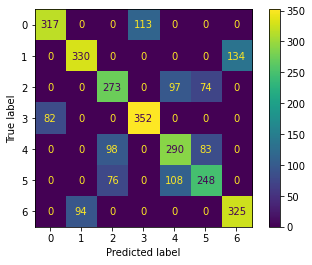

In [67]:
# visualizing the confusion matrix
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.svm import SVC




SVC(random_state=0)
predictions = rf_Grid.predict(x_test_scaled)
cm = confusion_matrix(y_test, predictions, labels=rf_Grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=rf_Grid.classes_)
disp.plot()

plt.show()

In [68]:
print('type 0=two family')
print('type 1=commercial') 
print('type 2=condo')
print('type 3=R')
print('type 4=single family')
print('type 5=A ')
print('type 6=Vacant land')

type 0=two family
type 1=commercial
type 2=condo
type 3=R
type 4=single family
type 5=A 
type 6=Vacant land


In [69]:
# creating dummy model-uniform
uniform_clf=DummyClassifier(strategy='uniform').fit(x_train_scaled,y_train)

In [70]:
scores5=cross_val_score(uniform_clf,x_train_scaled,y_train,cv=10)
scores5

array([0.14054927, 0.1453958 , 0.13812601, 0.14216478, 0.14297254,
       0.15508885, 0.13177041, 0.15117219, 0.15278901, 0.12691997])

In [71]:
scores5.mean()

0.14269488300293978

In [72]:
# uniform score on the test
uniform_clf.score(x_test_scaled,y_test)

0.143180349062702

In [73]:
# creating dummy model-stratified
stratified_clf=DummyClassifier(strategy='stratified').fit(x_train_scaled,y_train)

In [74]:
scores6=cross_val_score(uniform_clf,x_train_scaled,y_train,cv=10)
scores6

array([0.14701131, 0.16235864, 0.14135703, 0.14458805, 0.14378029,
       0.15993538, 0.15521423, 0.13823767, 0.13257882, 0.13985449])

In [75]:
scores6.mean()

0.14649159008127172

In [76]:
# stratified score on the test
stratified_clf.score(x_test_scaled,y_test)

0.14641241111829348

In [77]:
x=rf_Grid.score(x_test_scaled,y_test)
y=uniform_clf.score(x_test_scaled,y_test)
z=stratified_clf.score(x_test_scaled,y_test)
r=clf.score(x_test_scaled,y_test)
k=x-r

In [78]:
print('our model result is:')
print(x)
print('the un optimized random forest classifier result is:')
print(r)
print('the uniform model result is:')
print(y)
print('the stratified model result is:')
print(z)


our model result is:
0.6900452488687783
the un optimized random forest classifier result is:
0.6764705882352942
the uniform model result is:
0.14382676147382029
the stratified model result is:
0.1457659987071752


In [79]:
if x>r :
    print('our model was optimized')
    print('the model had an improvment of')
    print(k)
print('our model preformed better than the dummy models')

        

our model was optimized
the model had an improvment of
0.013574660633484115
our model preformed better than the dummy models
